<h1><b><center> Name: Ahmed Zaki Elbeltagy </center></b></h1>
<h1><b><center> Task one: Clustering Mall Customers </center></b></h1>

# Importing Useful Library

In [57]:
import time
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dataset/Mall_Customers.csv


In [86]:
data = pd.read_csv("/kaggle/input/dataset/Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Visualize different features together

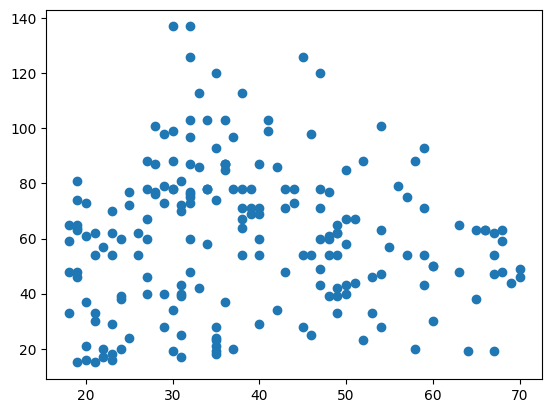

In [87]:
plt.scatter(data["Age"], data["Annual Income (k$)"])

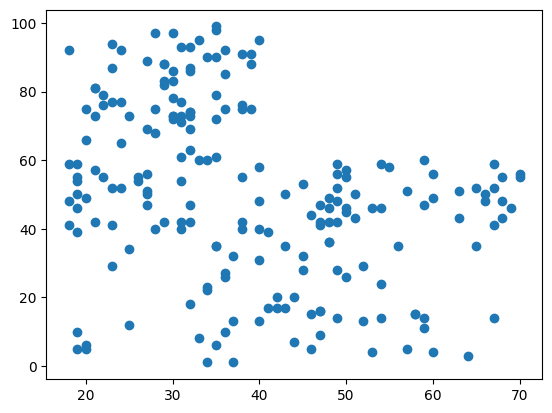

In [88]:
plt.scatter(data["Age"], data["Spending Score (1-100)"])

In [89]:
data[data["Annual Income (k$)"] == 137]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


## Get data info to know the types and the size of the data

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Drop CustomerID feature as it will not be helpful

In [91]:
data.drop(columns=["CustomerID"], inplace=True)
data.reset_index(drop=True)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


## Applying mapping on Gender column to replace each Female with 0 and each Male with 1

In [92]:
dic = {"Female":0, "Male":1}
data["Gender"]=data["Gender"].map(dic)

In [93]:
data.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [94]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(data)
# data = pd.DataFrame(X_scaled, index = data.index, columns = data.columns)
# data

# Applying elbow technique to get the best number of clusters to use

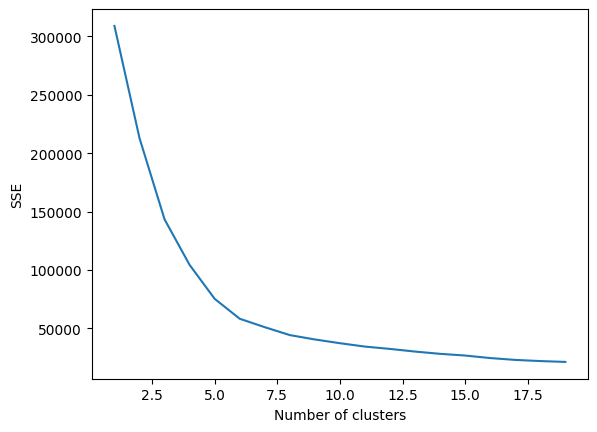

In [95]:
sse = []
k_range = range(1, 20)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(data)
    sse.append(km.inertia_)

plt.plot(k_range, sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

### From here we can see teh best choice for K was 6

In [96]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


### i have used here Kmeans clustering model to cluster(segment) the customers to 6 cluters

In [97]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
km = KMeans(n_clusters=6)
y_predicted = km.fit_predict(data)
y_predicted


array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 2, 5, 2, 3,
       4, 5, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

## Here I added the predicted values to my data

In [98]:
data["Segment"]=y_predicted
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Segment
0,1,19,15,39,4
1,1,21,15,81,5
2,0,20,16,6,4
3,0,23,16,77,5
4,0,31,17,40,4
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,0
197,1,32,126,74,1
198,1,32,137,18,0


<h1><b><center> Thank You. </center></b></h1>
<h4><b><center> Ahemd Z. Elbeltagy </center></b></h4>